In [14]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
import urllib

In [15]:
req = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/0/09/StLouisArchMultExpEV-4.72.JPG')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img0  = cv.imdecode(arr, cv.IMREAD_COLOR ) # 'Load it as grayscale'
# gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

req = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/c/c3/StLouisArchMultExpEV-1.82.JPG')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img1  = cv.imdecode(arr, cv.IMREAD_COLOR ) # 'Load it as grayscale'

req = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/8/89/StLouisArchMultExpEV%2B1.51.JPG')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img2  = cv.imdecode(arr, cv.IMREAD_COLOR ) # 'Load it as grayscale'

req = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/8/8f/StLouisArchMultExpEV%2B4.09.JPG')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img3  = cv.imdecode(arr, cv.IMREAD_COLOR ) # 'Load it as grayscale'

In [16]:
img_list =[img0, img1,img2,img3]
exposure_times = np.array([15.0, 2.5, 0.25, 0.0333], dtype=np.float32)

In [17]:
# Merge exposures to HDR image
merge_debevec = cv.createMergeDebevec()
hdr_debevec = merge_debevec.process(img_list, times=exposure_times.copy())
merge_robertson = cv.createMergeRobertson()
hdr_robertson = merge_robertson.process(img_list, times=exposure_times.copy())

In [22]:
# Tonemap HDR image
tonemap1 = cv.createTonemap(gamma=2.2)
res_debevec = tonemap1.process(hdr_debevec.copy())
res_robertson = tonemap1.process(hdr_robertson.copy())

In [19]:
# Exposure fusion using Mertens
merge_mertens = cv.createMergeMertens()
res_mertens = merge_mertens.process(img_list)

In [23]:
# Convert datatype to 8-bit and save
res_debevec_8bit = np.clip(res_debevec*255, 0, 255).astype('uint8')
res_robertson_8bit = np.clip(res_robertson*255, 0, 255).astype('uint8')
res_mertens_8bit = np.clip(res_mertens*255, 0, 255).astype('uint8')

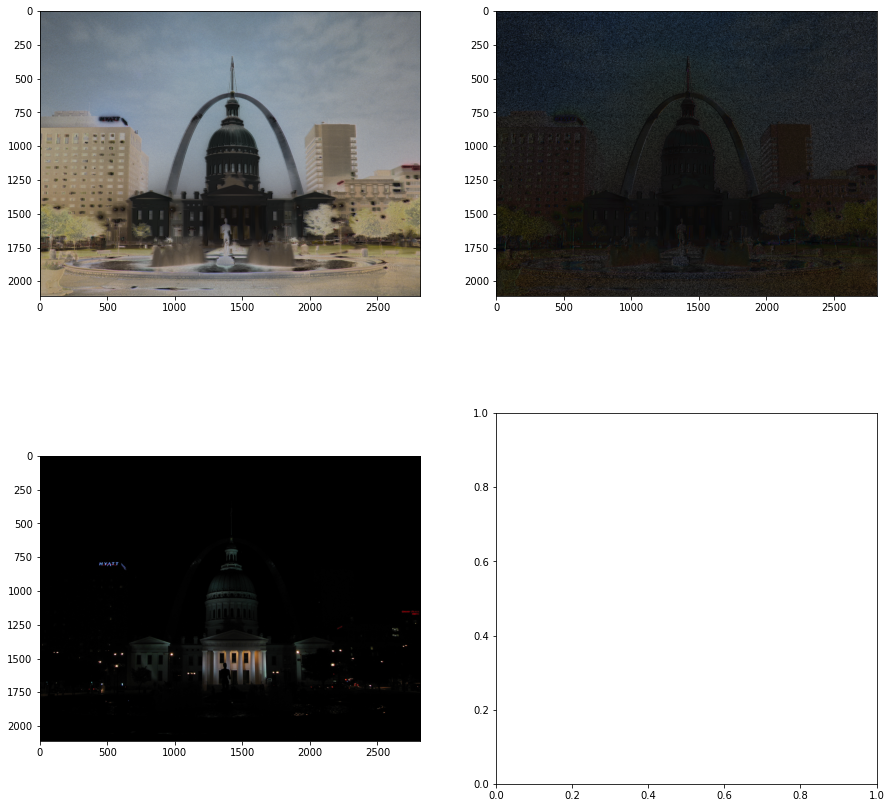

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))
ax[0,0].imshow(cv.cvtColor(res_debevec_8bit, cv.COLOR_BGR2RGB))
ax[0,1].imshow(cv.cvtColor(res_robertson_8bit, cv.COLOR_BGR2RGB))
ax[1,0].imshow(cv.cvtColor(res_mertens_8bit, cv.COLOR_BGR2RGB))
ax[1,0].imshow(cv.cvtColor(img0, cv.COLOR_BGR2RGB))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


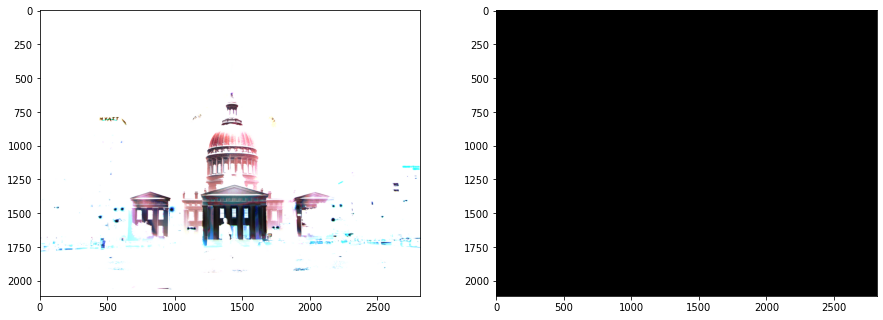

In [25]:
# Estimate camera response function (CRF)
cal_debevec = cv.createCalibrateDebevec()
crf_debevec = cal_debevec.process(img_list, times=exposure_times)
hdr_debevec = merge_debevec.process(img_list, times=exposure_times.copy(), response=crf_debevec.copy())

cal_robertson = cv.createCalibrateRobertson()
crf_robertson = cal_robertson.process(img_list, times=exposure_times)
hdr_robertson = merge_robertson.process(img_list, times=exposure_times.copy(), response=crf_robertson.copy())

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(cv.cvtColor(hdr_debevec,cv.COLOR_BGR2RGB ))
ax2.imshow(cv.cvtColor(hdr_robertson,cv.COLOR_BGR2RGB ))
plt.show()